In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.decomposition import PCA

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
warnings.filterwarnings('ignore')

In [3]:
from dataset import Dataset

In [4]:
path = r'E:\knns\data\cat_dog'
width = 84
height = 84 

In [5]:
loader = Dataset(path=path, width=width, height=height)
X = loader.load_images(path=path)
y = loader.load_labels(12500, 12500)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
X_train = X_train.reshape(X_train.shape[0], -1)
# X_train = X_train.astype('float32')
X_test = X_test.reshape(X_test.shape[0], -1)
# X_test = X_test.astype('float32')

In [8]:
def _confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    return cm

In [9]:
# pca = PCA(n_components=4096)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)

In [10]:
print(np.mean(X_train))
print(np.std(X_train))
print(np.var(X_train))

-7.723362954891004e-05
0.9552376284200558
0.9124789267495725


In [11]:
knn = KNeighborsClassifier(n_neighbors=9, metric='euclidean', weights='distance')
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

KNN Accuracy: 59.96%
KNN Precision: 66.28%
KNN Recall: 41.13%


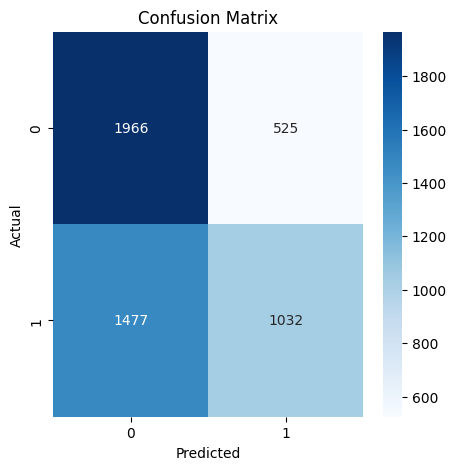

In [12]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='binary')  
recall_knn = recall_score(y_test, y_pred_knn, average='binary') 
print(f'KNN Accuracy: {accuracy_knn * 100:.2f}%')
print(f'KNN Precision: {precision_knn * 100:.2f}%')
print(f'KNN Recall: {recall_knn * 100:.2f}%')
cm_knn = _confusion_matrix(y_test, y_pred_knn)

In [13]:
svm = LinearSVC(loss='hinge', C=10)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

SVM Accuracy: 52.76%
SVM Precision: 53.12%
SVM Recall: 49.90%


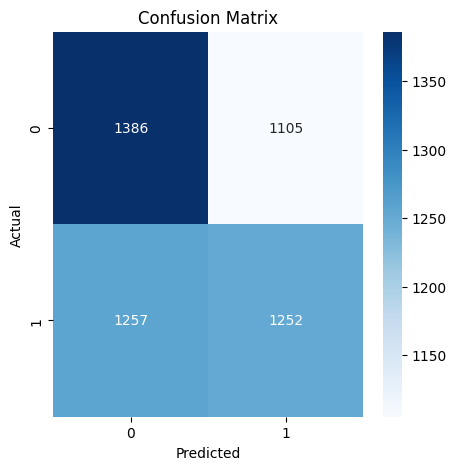

In [14]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='binary')  # Use 'binary' for binary classification
recall_svm = recall_score(y_test, y_pred_svm, average='binary') 
print(f'SVM Accuracy: {accuracy_svm * 100:.2f}%')
print(f'SVM Precision: {precision_svm * 100:.2f}%')
print(f'SVM Recall: {recall_svm * 100:.2f}%')
cm_svm = _confusion_matrix(y_test, y_pred_svm)

In [15]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

Gaussian Naive Bayes Accuracy: 59.02%
Gaussian Naive Bayes Precision: 59.30%
Gaussian Naive Bayes Recall: 58.47%


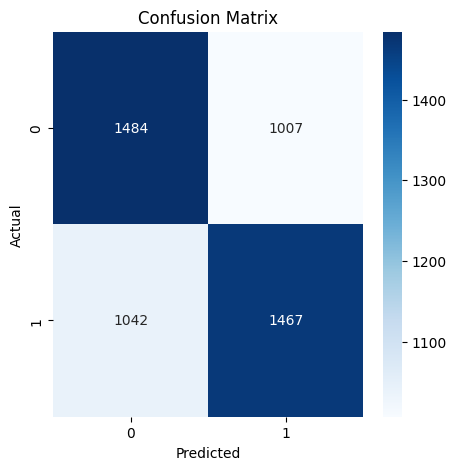

In [16]:
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
precision_gnb = precision_score(y_test, y_pred_gnb, average='binary')
recall_gnb = recall_score(y_test, y_pred_gnb, average='binary') 
print(f'Gaussian Naive Bayes Accuracy: {accuracy_gnb * 100:.2f}%')
print(f'Gaussian Naive Bayes Precision: {precision_gnb * 100:.2f}%')
print(f'Gaussian Naive Bayes Recall: {recall_gnb * 100:.2f}%')
cm_svm = _confusion_matrix(y_test, y_pred_gnb)

In [17]:
reg = LogisticRegression()
reg.fit(X_train, y_train)
y_pred_reg = reg.predict(X_test)

Logistic Regression Accuracy: 53.94%
Logistic Regression Precision: 54.48%
Logistic Regression Recall: 49.90%


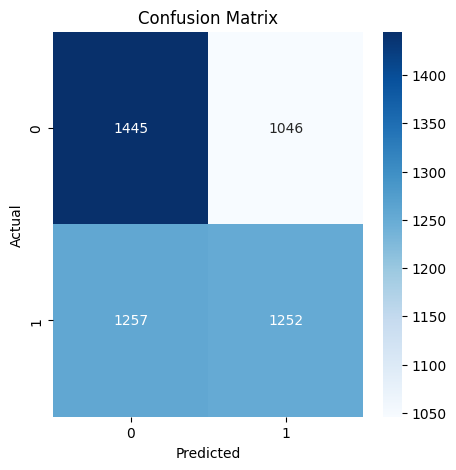

In [18]:
accuracy_reg = accuracy_score(y_test, y_pred_reg)
precision_reg = precision_score(y_test, y_pred_reg, average='binary')  # Use 'binary' for binary classification
recall_reg = recall_score(y_test, y_pred_reg, average='binary') 
print(f'Logistic Regression Accuracy: {accuracy_reg * 100:.2f}%')
print(f'Logistic Regression Precision: {precision_reg * 100:.2f}%')
print(f'Logistic Regression Recall: {recall_reg * 100:.2f}%')
cm_reg = _confusion_matrix(y_test, y_pred_reg)

In [19]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)

Decision Tree Accuracy: 54.62%
Decision Tree Precision: 54.84%
Decision Tree Recall: 54.17%


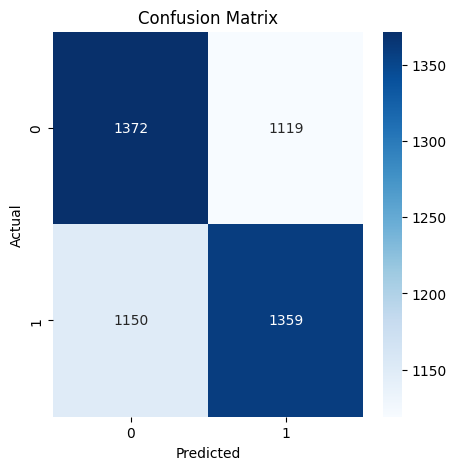

In [20]:
accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
precision_dtc = precision_score(y_test, y_pred_dtc, average='binary')  # Use 'binary' for binary classification
recall_dtc = recall_score(y_test, y_pred_dtc, average='binary') 
print(f'Decision Tree Accuracy: {accuracy_dtc * 100:.2f}%')
print(f'Decision Tree Precision: {precision_dtc * 100:.2f}%')
print(f'Decision Tree Recall: {recall_dtc * 100:.2f}%')
cm_dtc = _confusion_matrix(y_test, y_pred_dtc)

In [21]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

Random Forests Accuracy: 64.62%
Frandom Forests Precision: 65.73%
Random Forests Recall: 61.62%


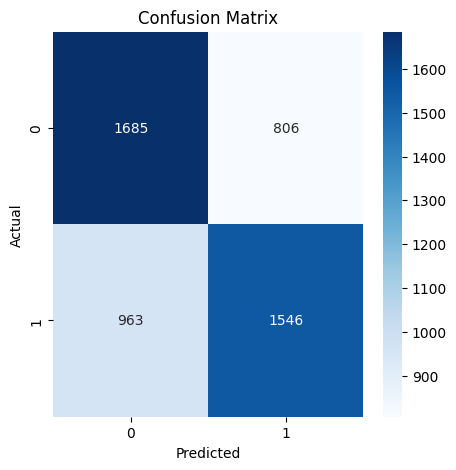

In [22]:
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
precision_rfc = precision_score(y_test, y_pred_rfc, average='binary')  # Use 'binary' for binary classification
recall_rfc = recall_score(y_test, y_pred_rfc, average='binary') 
print(f'Random Forests Accuracy: {accuracy_rfc * 100:.2f}%')
print(f'Frandom Forests Precision: {precision_rfc * 100:.2f}%')
print(f'Random Forests Recall: {recall_rfc * 100:.2f}%')
cm_rfc = _confusion_matrix(y_test, y_pred_rfc)